In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
df_index=pd.read_csv("economic_index.csv")

In [40]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [41]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [42]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [43]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

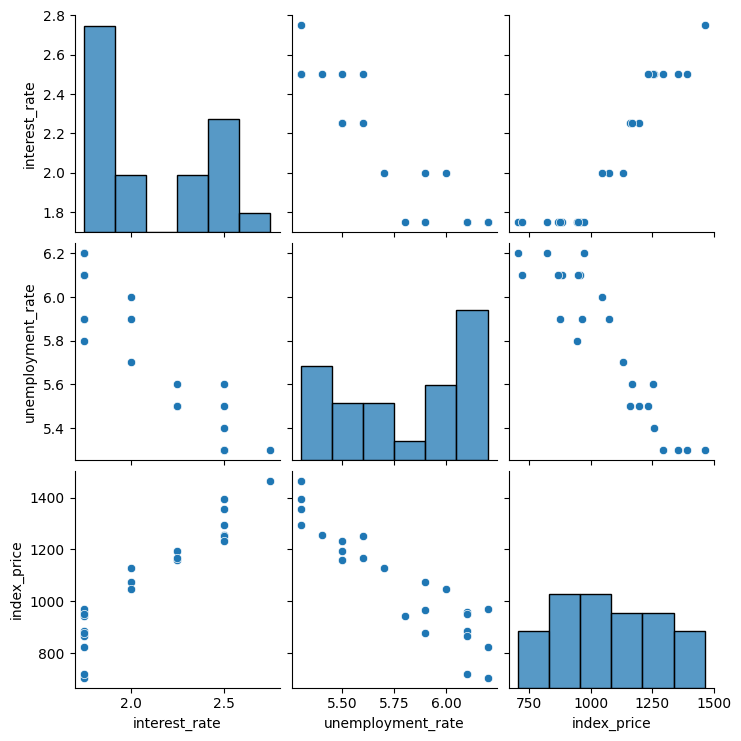

In [44]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

In [45]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

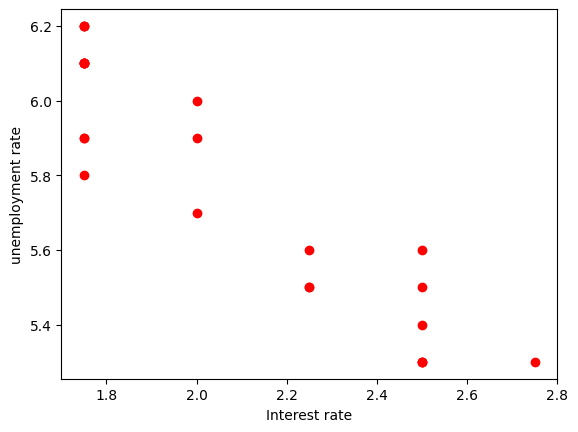

In [46]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [47]:
##independent and dependent features
X=df_index.iloc[:,:-1] # ['interest_rate', ''unemployment_rate']
y=df_index.iloc[:,-1]

In [48]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [49]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [50]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

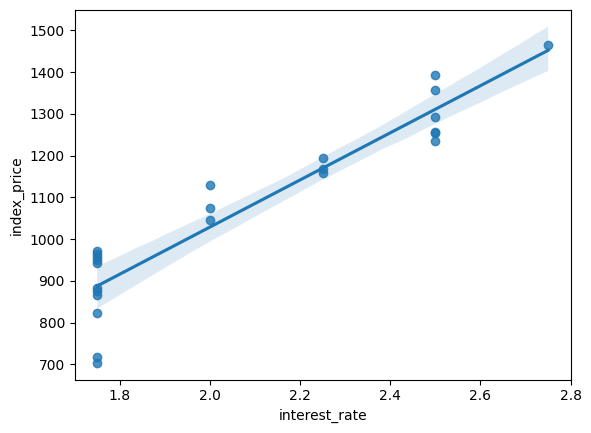

In [52]:
# sns.regplot(df_index['interest_rate'],df_index['index_price'])
sns.regplot(data=df_index, x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

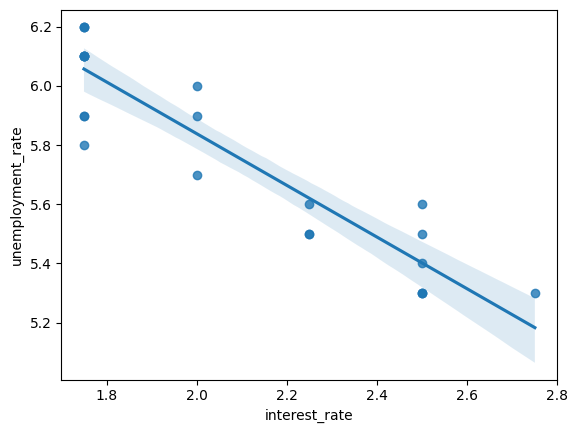

In [53]:
# sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])
sns.regplot(data=df_index, x='interest_rate', y='unemployment_rate')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

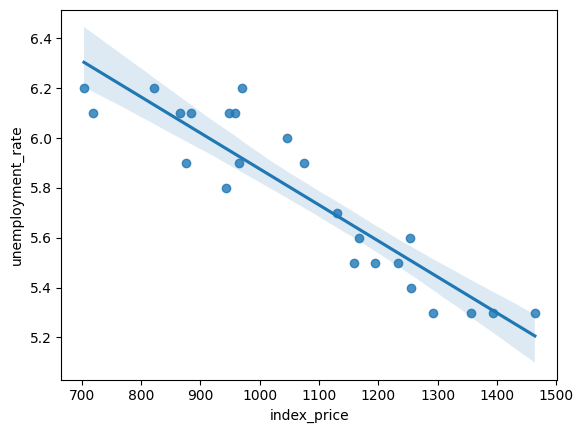

In [54]:
# sns.regplot(df_index['index_price'],df_index['unemployment_rate'])
sns.regplot(data=df_index, x='index_price', y='unemployment_rate')

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [58]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [59]:
regression.fit(X_train,y_train)

LinearRegression()

In [61]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)
print(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [ ]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [ ]:
## prediction
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


## Assumptions

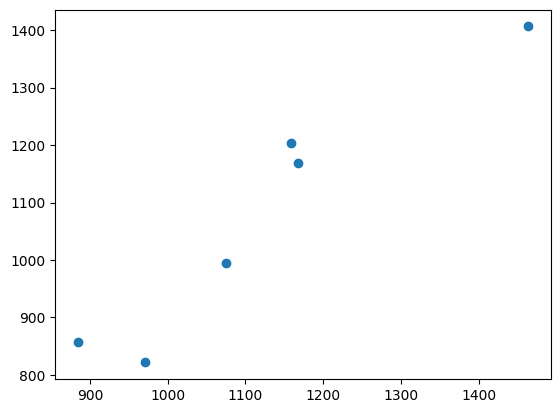

In [ ]:
plt.scatter(y_test,y_pred)

### Predicted vs Actual Plot

This plot compares the actual values (from the test set) to the values predicted by the model.  
- **What to look for:** If the model is good, the points should be close to a straight diagonal line (where predicted = actual).
- **What it means:** The closer the points are to this line, the better the model's predictions. If you see a clear curve or pattern, it means the model is missing something (like a non-linear relationship).

---

In [76]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


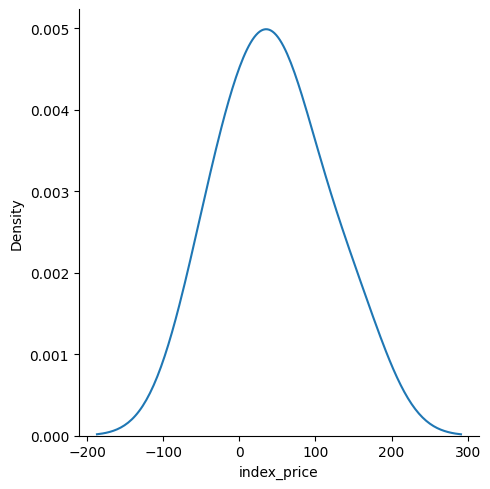

In [77]:
## Plot this residuals
sns.displot(residuals,kind='kde')


### Residuals Distribution Plot

This plot shows how the errors (residuals) are distributed.
- **What to look for:** The curve should look like a bell (normal distribution) and be centered at zero.
- **What it means:** If the residuals are normally distributed and centered at zero, it means the model's errors are random and the model is likely appropriate. If the curve is skewed or has multiple peaks, there may be outliers or the model may not be a good fit.

---

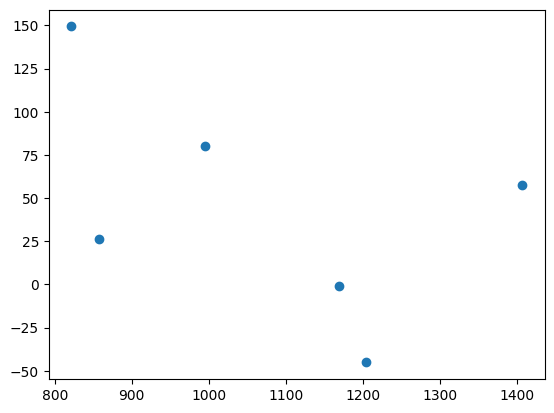

In [78]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

### Residuals vs Predicted Plot

This plot shows the residuals (errors) for each predicted value.
- **What to look for:** The points should be randomly scattered around the horizontal line at zero, with no clear pattern.
- **What it means:** Random scatter means the model’s assumptions (like constant variance and linearity) are likely met. If you see a pattern (like a funnel shape or curve), it suggests problems such as non-linearity or changing error variance (heteroscedasticity).

---

In [79]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [80]:
model.summary()

C:\Users\ARNAVSIN\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 03 Jul 2025   Prob (F-statistic):                       0.754
Time:                        15:06:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print(regression.coef_)

[  88.27275507 -116.25716066]
